In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
grab = pd.read_feather('comparative-ecosystems\data\w3_grab.feather')
sensor = pd.read_feather('comparative-ecosystems\data\w3_sensor_wdisch.feather')

In [3]:
grab.head()# no duplicated rows

datetime        date site_name  GN_Ca  GN_Cl  GN_DIC  \
0 2012-10-16 11:00:00+05:00  2012-10-16        w3   0.62   0.32   0.039   
1 2012-10-23 11:00:00+05:00  2012-10-23        w3   0.62   0.36   0.039   
2 2012-10-30 11:00:00+05:00  2012-10-30        w3   0.65   0.35   0.039   
3 2012-11-06 11:00:00+05:00  2012-11-06        w3   0.63   0.48   0.032   
4 2012-11-13 11:00:00+05:00  2012-11-13        w3   0.66   0.44   0.039   

   GN_DOC  GN_DON  GN_F  GN_Fe  ...  GN_NH4  GN_NO3  GN_OMAl  GN_PO4  GN_SiO2  \
0     NaN     NaN   NaN    NaN  ...   0.005    0.01      NaN  0.0005      5.2   
1     NaN     NaN   NaN    NaN  ...   0.005    0.01      NaN  0.0005      5.2   
2     NaN     NaN   NaN    NaN  ...   0.005    0.01      NaN  0.0005      5.9   
3     NaN     NaN   NaN    NaN  ...   0.005    0.01      NaN  0.0005      5.6   
4     NaN     NaN   NaN    NaN  ...   0.005    0.05      NaN  0.0005      5.8   

   GN_SO4  GN_spCond  GN_TDN  GN_temp  GN_TMAl  
0    2.96       10.4     NaN      8.6      NaN  
1    2.84        9.7     NaN      8.8      NaN  
2    3.01       10.8     NaN      9.6      NaN  
3    2.91       10.5     NaN      5.4      NaN  
4    3.03       10.3     NaN      6.4      NaN  

[5 rows x 24 columns]

In [4]:
sensor.tail()# after sensor.loc[sensor.duplicated()] check no duplicate rows

date  IS_temp  IS_spCond  IS_pH  IS_ODO_mgL  IS_ODO_percent  \
155471  2017-07-31    13.95      18.01   6.44        9.05           87.69   
155472  2017-07-31    13.98      18.02   6.44        9.05           87.75   
155473  2017-07-31    14.00      18.02   6.44        9.07           87.98   
155474  2017-07-31    14.03      18.02   6.44        9.10           88.36   
155475  2017-07-31    14.06      18.01   6.44        9.12           88.64   

        IS_turbidity  IS_NO3  IS_FDOM            round_datetime  \
155471          0.47   0.034    14.64 2017-07-31 11:00:00+05:00   
155472          0.48   0.033    14.71 2017-07-31 11:15:00+05:00   
155473          0.48   0.034    14.95 2017-07-31 11:30:00+05:00   
155474          0.46   0.033    15.61 2017-07-31 11:45:00+05:00   
155475          0.48   0.033    15.16 2017-07-31 12:00:00+05:00   

                        datetime  IS_discharge  
155471 2017-07-31 11:03:00+05:00        0.1415  
155472 2017-07-31 11:18:00+05:00        0.1415  
155473 2017-07-31 11:33:00+05:00        0.1415  
155474 2017-07-31 11:47:00+05:00        0.1415  
155475 2017-07-31 12:03:00+05:00        0.1415

In [5]:
grab["time"] = pd.DatetimeIndex(grab.datetime).tz_localize(None)
grab = grab.sort_values(by = ["time"]).copy()
sensor["time"] = pd.DatetimeIndex(sensor.round_datetime).tz_localize(None)
sensor = sensor.sort_values(by = ["time"]).copy()
sensor.sort_values(by = ["time"])

date  IS_temp  IS_spCond  IS_pH  IS_ODO_mgL  IS_ODO_percent  \
0       2012-10-11      NaN      11.85   5.52       11.09           93.96   
1       2012-10-11     8.14      11.85   5.52       11.09           93.96   
2       2012-10-11     7.92      11.85   5.52       11.32           95.38   
3       2012-10-11     9.23      11.85   5.52       10.76           93.59   
4       2012-10-11     9.25      11.70   5.54       10.69           93.00   
...            ...      ...        ...    ...         ...             ...   
155471  2017-07-31    13.95      18.01   6.44        9.05           87.69   
155472  2017-07-31    13.98      18.02   6.44        9.05           87.75   
155473  2017-07-31    14.00      18.02   6.44        9.07           87.98   
155474  2017-07-31    14.03      18.02   6.44        9.10           88.36   
155475  2017-07-31    14.06      18.01   6.44        9.12           88.64   

        IS_turbidity  IS_NO3  IS_FDOM            round_datetime  \
0               2.37   0.040    20.59 2012-10-11 12:15:00+05:00   
1               2.37   0.040    20.59 2012-10-11 12:30:00+05:00   
2               2.37   0.040    20.59 2012-10-11 12:45:00+05:00   
3               2.37   0.040    20.59 2012-10-11 13:00:00+05:00   
4               1.51   0.040    20.66 2012-10-11 13:15:00+05:00   
...              ...     ...      ...                       ...   
155471          0.47   0.034    14.64 2017-07-31 11:00:00+05:00   
155472          0.48   0.033    14.71 2017-07-31 11:15:00+05:00   
155473          0.48   0.034    14.95 2017-07-31 11:30:00+05:00   
155474          0.46   0.033    15.61 2017-07-31 11:45:00+05:00   
155475          0.48   0.033    15.16 2017-07-31 12:00:00+05:00   

                        datetime  IS_discharge                time  
0      2012-10-11 12:17:00+05:00     14.125330 2012-10-11 12:15:00  
1      2012-10-11 12:32:00+05:00     14.103715 2012-10-11 12:30:00  
2      2012-10-11 12:46:00+05:00     13.982946 2012-10-11 12:45:00  
3      2012-10-11 13:02:00+05:00     13.862716 2012-10-11 13:00:00  
4      2012-10-11 13:17:00+05:00     13.842720 2012-10-11 13:15:00  
...                          ...           ...                 ...  
155471 2017-07-31 11:03:00+05:00      0.141500 2017-07-31 11:00:00  
155472 2017-07-31 11:18:00+05:00      0.141500 2017-07-31 11:15:00  
155473 2017-07-31 11:33:00+05:00      0.141500 2017-07-31 11:30:00  
155474 2017-07-31 11:47:00+05:00      0.141500 2017-07-31 11:45:00  
155475 2017-07-31 12:03:00+05:00      0.141500 2017-07-31 12:00:00  

[155476 rows x 13 columns]

In [6]:
apple_training_complete = pd.merge_asof(sensor,grab,left_on = "time", right_on = "time",tolerance=pd.Timedelta('1min'),direction='nearest').copy()#tolerance=pd.Timedelta('1h'),
#apple_training_complete = pd.merge(sensor,grab,left_on = ["date","time"], right_on = ["date","time"], how = "outer").copy() #,tolerance=pd.Timedelta('1h'),direction='backward')
apple_training_complete.tail()#[["date","time","IS_temp", "GN_Ca"]]

date_x  IS_temp  IS_spCond  IS_pH  IS_ODO_mgL  IS_ODO_percent  \
155471  2017-07-31    13.95      18.01   6.44        9.05           87.69   
155472  2017-07-31    13.98      18.02   6.44        9.05           87.75   
155473  2017-07-31    14.00      18.02   6.44        9.07           87.98   
155474  2017-07-31    14.03      18.02   6.44        9.10           88.36   
155475  2017-07-31    14.06      18.01   6.44        9.12           88.64   

        IS_turbidity  IS_NO3  IS_FDOM            round_datetime  ... GN_NH4  \
155471          0.47   0.034    14.64 2017-07-31 11:00:00+05:00  ...    NaN   
155472          0.48   0.033    14.71 2017-07-31 11:15:00+05:00  ...    NaN   
155473          0.48   0.034    14.95 2017-07-31 11:30:00+05:00  ...    NaN   
155474          0.46   0.033    15.61 2017-07-31 11:45:00+05:00  ...    NaN   
155475          0.48   0.033    15.16 2017-07-31 12:00:00+05:00  ...    NaN   

        GN_NO3 GN_OMAl GN_PO4 GN_SiO2 GN_SO4  GN_spCond  GN_TDN  GN_temp  \
155471     NaN     NaN    NaN     NaN    NaN        NaN     NaN      NaN   
155472     NaN     NaN    NaN     NaN    NaN        NaN     NaN      NaN   
155473     NaN     NaN    NaN     NaN    NaN        NaN     NaN      NaN   
155474     NaN     NaN    NaN     NaN    NaN        NaN     NaN      NaN   
155475     NaN     NaN    NaN     NaN    NaN        NaN     NaN      NaN   

        GN_TMAl  
155471      NaN  
155472      NaN  
155473      NaN  
155474      NaN  
155475      NaN  

[5 rows x 37 columns]

In [7]:
## save to scv
#apple_training_complete.to_csv("combine1.csv",index = False)
apple_training_complete.shape

(155476, 37)

In [8]:
apple_training_complete.loc[~apple_training_complete.datetime_y.isna()].shape

(201, 37)

In [9]:
apple_training_complete.loc[(~apple_training_complete['GN_NO3'].isna())].shape

(201, 37)

In [10]:
wkmeasurement = apple_training_complete.loc[(~apple_training_complete['GN_NO3'].isna())].copy() #&(~apple_training_complete['Ca..mg.Ca.L.'].isna())&(~apple_training_complete['PO4..ug.P.L.'].isna())
#leave sound weekly data for 'K..mg.K.L.'; 'Ca..mg.Ca.L.';'PO4..ug.P.L.' (prediction)

In [11]:
plt.figure(figsize = (18,9))
plt.plot(range(wkmeasurement.shape[0]),(wkmeasurement['GN_NO3']))
#plt.xticks(range(0,wkmeasurement.shape[0],5),wkmeasurement['Date'].loc[::5],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('GN_NO3',fontsize=18)
plt.show()#we have 

In [12]:
wkmeasurement["year"] = pd.DatetimeIndex(wkmeasurement.time).year

In [13]:
wkmeasurement[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
       'IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', 'GN_NO3', "year"]].tail()#, 'IS_NO3'

IS_temp  IS_spCond    IS_pH  IS_ODO_mgL  IS_ODO_percent  IS_turbidity  \
146854     6.72       9.75  5.73000       11.55           94.47          0.68   
147520     5.64       9.63  5.77217       11.90           94.76          0.38   
148192     9.12       9.11  5.74115       10.94           94.94          0.35   
148863     9.54      10.33  5.93014       10.84           95.02          0.45   
149631     8.99       9.90  5.74612       11.02           95.34           NaN   

        IS_FDOM  IS_discharge  GN_NO3  year  
146854    40.21       21.8478  0.0705  2017  
147520    35.03       14.1216  0.0850  2017  
148192    38.31       21.8478  0.1024  2017  
148863    34.11       10.9828  0.0253  2017  
149631      NaN       28.9969  0.0253  2017

In [14]:
wkmeasurement.keys()

Index(['date_x', 'IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
       'IS_ODO_percent', 'IS_turbidity', 'IS_NO3', 'IS_FDOM', 'round_datetime',
       'datetime_x', 'IS_discharge', 'time', 'datetime_y', 'date_y',
       'site_name', 'GN_Ca', 'GN_Cl', 'GN_DIC', 'GN_DOC', 'GN_DON', 'GN_F',
       'GN_Fe', 'GN_K', 'GN_Mg', 'GN_Mn', 'GN_Na', 'GN_NH4', 'GN_NO3',
       'GN_OMAl', 'GN_PO4', 'GN_SiO2', 'GN_SO4', 'GN_spCond', 'GN_TDN',
       'GN_temp', 'GN_TMAl', 'year'],
      dtype='object')

In [15]:
apple_test = wkmeasurement[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
       'IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', 'GN_NO3']].loc[(wkmeasurement.year == 2017)&(~wkmeasurement.GN_NO3.isna())].copy()#, 'IS_discharge'
apple_val = wkmeasurement[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
       'IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', 'GN_NO3']].loc[(wkmeasurement.year == 2016)&(~wkmeasurement.GN_NO3.isna())].copy()#, 'IS_discharge'
apple_train = wkmeasurement[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
       'IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', 'GN_NO3']].loc[(wkmeasurement.year < 2016)&(~wkmeasurement.GN_NO3.isna())].copy()#, 'IS_discharge'
all_data = wkmeasurement[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
       'IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', 'GN_NO3']].loc[~wkmeasurement.GN_NO3.isna()].copy()#, 'IS_discharge'

In [17]:
## using sklearn package
from sklearn.preprocessing import MinMaxScaler
import impyute

scaler = MinMaxScaler(feature_range = (0, 1))#apply to all features
#all_array = all_data.to_numpy()
#all_array = impyute.imputation.ts.locf(all_array, axis=1)
#all_scaled = scaler.fit_transform(all_array)

train_array = apple_train.to_numpy()
train_array = impyute.imputation.ts.locf(train_array, axis=1)
apple_training_scaled = scaler.fit_transform(train_array) #fill na value as -1
#apple_training_scaled = scaler.transform(train_array) #fill na value as -1

scaler1 = MinMaxScaler(feature_range = (0, 1))
val_array = apple_val.to_numpy()
#val_array = impyute.imputation.ts.locf(val_array, axis=1) #No NaN's in given data
#apple_val_scaled = scaler.transform(val_array)
apple_val_scaled = scaler1.fit_transform(val_array)

scaler2 = MinMaxScaler(feature_range = (0, 1))
test_array = apple_test.to_numpy()#, 'IS_discharge'
test_array = impyute.imputation.ts.locf(test_array, axis=1)
#test_scaled = scaler.transform(test_array)
test_scaled = scaler2.fit_transform(test_array)
apple_train.shape[1]

9

In [18]:
timesteps = 1 ## for future fine tuning
features_set = []  #get the features for training after rescaled
labels = []        #get the prediction result for training after rescaled
for i in range(apple_train.shape[0]):  
    features_set.append(apple_training_scaled[i, 0:apple_train.shape[1]-1])
    labels.append(apple_training_scaled[i, apple_train.shape[1]-1])
    
features_set_val = []  #get the features for training
labels_val = []        #get the prediction result for training
for i in range(apple_val.shape[0]):
    features_set_val.append(apple_val_scaled[i, 0:apple_val.shape[1]-1])
    labels_val.append(apple_val_scaled[i, apple_val.shape[1]-1])
    
#features_set_all = []  #get the features for training
#labels_all = []        #get the prediction result for training
#for i in range(all_data.shape[0]):
#    features_set_all.append(all_scaled[i, 0:all_data.shape[1]-1])
#    labels_all.append(all_scaled[i, all_data.shape[1]-1])
features_set, labels = np.array(features_set), np.array(labels)
features_set_val, labels_val = np.array(features_set_val), np.array(labels_val)
#features_set_all, labels_all = np.array(features_set_all), np.array(labels_all)
features_set.shape

(137, 8)

In [19]:
####Consider a Numpy data array x of shape (samples, timesteps,features), to be fed to an LSTM layer.####
features_set = np.reshape(features_set, (features_set.shape[0], timesteps, features_set.shape[1]))
features_set_val = np.reshape(features_set_val, (features_set_val.shape[0], timesteps, features_set_val.shape[1]))
#features_set_all = np.reshape(features_set_all, (features_set_all.shape[0], timesteps, features_set_all.shape[1]))

In [20]:
import tensorflow as tf
import sklearn
print(tf.version)
print(sklearn.__version__)

<module 'tensorflow._api.v2.version' from 'C:\\programming\\conda\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
0.23.1


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Masking
from keras.optimizers import Adam

In [61]:
BS = 3
EPOCHS = 100
opt = Adam(lr=0.0005, decay=0.23 / (EPOCHS))

In [62]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1],features_set.shape[2])))#set first layer and the feature shape for each row
model.add(Dropout(0.29))
model.add(LSTM(units=50, return_sequences=True))#set first layer and the feature shape for each row
model.add(Dropout(0.29))
model.add(LSTM(units=50, return_sequences=True))#set first layer and the feature shape for each row
model.add(Dropout(0.29))
#model.add(Dense(units = 10,activation='tanh'))
model.add(Dense(units = 1,activation='relu'))
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=["binary_crossentropy"])

In [63]:
checkpoint_filepath = 'checkpoint.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1, 50)             11800     
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)             

In [65]:
history = model.fit(features_set, labels, epochs = EPOCHS, batch_size = BS, validation_data=(features_set_val, labels_val), callbacks=[model_checkpoint_callback])

Epoch 1/100
46/46 [==============================] - 1s 28ms/step - loss: 0.8831 - binary_crossentropy: 0.8831 - val_loss: 1.3414 - val_binary_crossentropy: 1.3414
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.7129 - binary_crossentropy: 0.7129 - val_loss: 1.1743 - val_binary_crossentropy: 1.1743
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6406 - binary_crossentropy: 0.6406 - val_loss: 1.0351 - val_binary_crossentropy: 1.0351
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5904 - binary_crossentropy: 0.5904 - val_loss: 0.9354 - val_binary_crossentropy: 0.9354
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5558 - binary_crossentropy: 0.5558 - val_loss: 0.8408 - val_binary_crossentropy: 0.8408
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5220 - binary_crossentropy: 0.5220 - val_loss: 0.7935 - val_binary_crossentropy: 0.7935
Epoch 7/100
46/46 [==

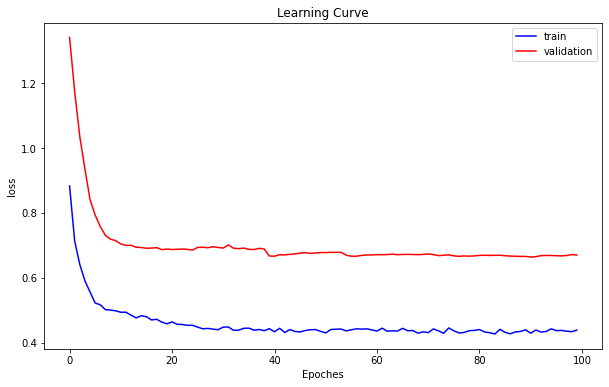

In [66]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"], color='blue', label='train')
plt.plot(history.history["val_loss"] , color='red', label='validation')
#plt.plot(hist_df["loss"], color='blue', label='train')
#plt.plot(hist_df["val_loss"] , color='red', label='validation')
plt.title('Learning Curve')
plt.xlabel('Epoches')
plt.ylabel('loss')
plt.legend()
plt.show()
#model.load_weights("checkpoint.hdf5")

In [27]:
### read model and training history
#filename = 'LSTM_MM_0037_43_20e_b3'
#model = tf.keras.models.load_model(filename)
#hist_df = pd.DataFrame(history.history) 
#hist_df = pd.read_csv(filename+".csv")

In [67]:
predictions = model.predict(features_set)
predictions = np.reshape(predictions, (features_set.shape[0]))
np.mean((predictions - labels)**2)

0.024041474341234978

# Model check on training set

In [68]:
train = apple_training_scaled.copy()
train[:,train.shape[1]-1] = predictions
result_train = scaler.inverse_transform(train)
#result_train = train*myscaler
np.sqrt(np.mean((result_train[:,train.shape[1]-1] - train_array[:,train.shape[1]-1])**2))

0.3519240980788751

In [69]:
np.mean(np.abs(result_train[:,train.shape[1]-1] - train_array[:,train.shape[1]-1]))

0.2497231064692466

In [70]:
1-np.mean(np.abs((result_train[:,train.shape[1]-1] - train_array[:,train.shape[1]-1])/train_array[:,train.shape[1]-1]))

-2.2451085840426934

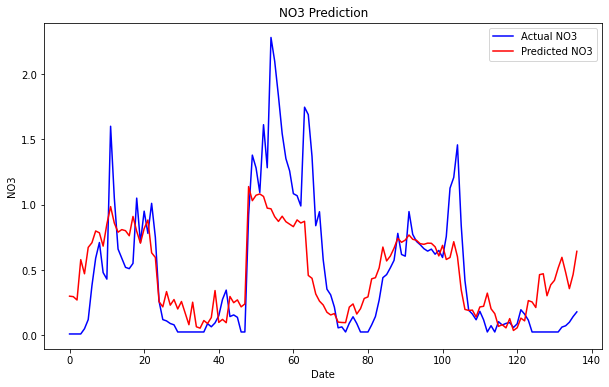

In [71]:
plt.figure(figsize=(10,6))
plt.plot(train_array[:,train.shape[1]-1], color='blue', label='Actual NO3')
plt.plot(result_train[:,train.shape[1]-1] , color='red', label='Predicted NO3')
plt.title('NO3 Prediction')
plt.xlabel('Date')
plt.ylabel('NO3')
plt.legend()
plt.show()

## Model check on Val set

In [72]:
predictions1 = model.predict(features_set_val)
predictions1 = np.reshape(predictions1, (features_set_val.shape[0]))
np.mean((predictions1 - labels_val)**2)

0.0744610271837706

In [73]:
val = apple_val_scaled.copy()
val[:,val.shape[1]-1] = predictions1
#result_val = scaler.inverse_transform(val)
result_val = scaler1.inverse_transform(val)
#result_val = val*myscaler
np.sqrt(np.mean((result_val[:,val.shape[1]-1] - val_array[:,val.shape[1]-1])**2))# 1 - rmse

0.11951945991780286

In [74]:
np.mean(np.abs(result_val[:,val.shape[1]-1] - val_array[:,val.shape[1]-1]))

0.09129432170533164

In [75]:
1-(np.mean(np.abs((result_val[:,val.shape[1]-1] - val_array[:,val.shape[1]-1])))/np.mean(val_array[:,val.shape[1]-1]))

0.517596392920695

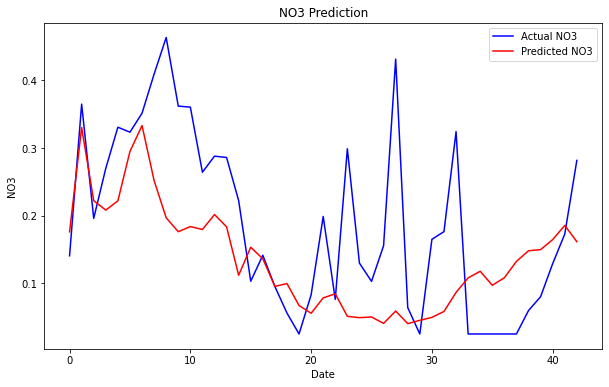

In [76]:
plt.figure(figsize=(10,6))
plt.plot(val_array[:,val.shape[1]-1], color='blue', label='Actual NO3')
plt.plot(result_val[:,val.shape[1]-1] , color='red', label='Predicted NO3')
plt.title('NO3 Prediction')
plt.xlabel('Date')
plt.ylabel('NO3')
plt.legend()
plt.show()

# Model performance on test set

In [38]:
#this is done in the begining
#scaler2 = MinMaxScaler(feature_range = (0, 1))
#test_array = apple_test[[
#       'IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL',
#       'IS_ODO_percent', 'IS_turbidity', 'IS_NO3', 'IS_FDOM', 'IS_discharge', 'GN_Ca']].to_numpy()#, 'IS_discharge'
#test_array = impyute.imputation.ts.locf(test_array, axis=1)
#test_scaled = scaler2.fit_transform(test_array)
#test_scaled = scaler.transform(test_array)
#test_scaled.shape

In [77]:
test_features = []
test_labels = []
#for i in range(test_scaled.shape[0]):
#    test_features.append(test_scaled[i-60:i, 0])
for i in range(test_scaled.shape[0]):
    test_features.append(test_scaled[i, 0:test_scaled.shape[1]-1])
    test_labels.append(test_scaled[i, test_scaled.shape[1]-1])
    
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0],timesteps, test_features.shape[1]))

In [78]:
predictions2 = model.predict(test_features)
predictions2 = np.reshape(predictions2, (test_features.shape[0]))
test_scaled[:, test_scaled.shape[1]-1] = predictions2
#result_test = scaler.inverse_transform(test_scaled)
result_test = scaler2.inverse_transform(test_scaled)
#result = test_scaled*myscaler
np.sqrt(np.mean((result_test[:,test_scaled.shape[1]-1] - test_array[:,test_scaled.shape[1]-1])**2))

0.07775200909027427

In [79]:
np.mean(np.abs(result_test[:,test_scaled.shape[1]-1] - test_array[:,test_scaled.shape[1]-1]))

0.05979756539861362

In [80]:
np.mean(1-(np.abs((result_test[:,test_scaled.shape[1]-1] - test_array[:,test_scaled.shape[1]-1])/test_array[:,test_scaled.shape[1]-1])))

0.6184080568613681

In [81]:
plt.figure(figsize=(10,6))
plt.plot(test_array[:,test_scaled.shape[1]-1], color='blue', label='Actual NO3')
plt.plot(result_test[:,test_scaled.shape[1]-1] , color='red', label='Predicted NO3')
plt.title('NO3 Prediction')
plt.xlabel('Date')
plt.ylabel('NO3')
plt.legend()
plt.show()

In [82]:
'''
save model and training history
'''
filename = 'LSTM_MM_0037_43_20e_b3_imp_3scaler_NO3'
model.save(filename)
hist_df = pd.DataFrame(history.history) 
hist_df.to_csv(filename+".csv", index=False)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: LSTM_MM_0037_43_20e_b3_imp_3scaler_NO3\assets


# plot for full screen

In [83]:

whole = apple_training_complete[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL','IS_ODO_percent', 'IS_turbidity', 'IS_NO3', 'IS_FDOM', 'IS_discharge', "GN_NO3","date_x", "time"]].copy()
whole["year"] = pd.DatetimeIndex(whole.time).year
whole.head()

IS_temp  IS_spCond  IS_pH  IS_ODO_mgL  IS_ODO_percent  IS_turbidity  \
0      NaN      11.85   5.52       11.09           93.96          2.37   
1     8.14      11.85   5.52       11.09           93.96          2.37   
2     7.92      11.85   5.52       11.32           95.38          2.37   
3     9.23      11.85   5.52       10.76           93.59          2.37   
4     9.25      11.70   5.54       10.69           93.00          1.51   

   IS_NO3  IS_FDOM  IS_discharge  GN_NO3      date_x                time  year  
0    0.04    20.59     14.125330     NaN  2012-10-11 2012-10-11 12:15:00  2012  
1    0.04    20.59     14.103715     NaN  2012-10-11 2012-10-11 12:30:00  2012  
2    0.04    20.59     13.982946     NaN  2012-10-11 2012-10-11 12:45:00  2012  
3    0.04    20.59     13.862716     NaN  2012-10-11 2012-10-11 13:00:00  2012  
4    0.04    20.66     13.842720     NaN  2012-10-11 2012-10-11 13:15:00  2012

In [85]:
#scalertot = MinMaxScaler(feature_range = (0, 1))
df = whole[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL','IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', "GN_NO3"]].loc[whole.year<2016].copy()#, 'IS_NO3'
tot = impyute.imputation.ts.locf(df.to_numpy(), axis=1)
scaled_tot = scaler.transform(tot)
tot_features = []
tot_labels = []
for i in range(scaled_tot.shape[0]):
    tot_features.append(scaled_tot[i, 0:scaled_tot.shape[1]-1])

tot_features = np.array(tot_features)
tot_features = np.reshape(tot_features, (tot_features.shape[0],timesteps, tot_features.shape[1]))

In [86]:
pred4 = model.predict(tot_features)
pred4 = np.reshape(pred4, (tot_features.shape[0]))
scaled_tot[:, scaled_tot.shape[1]-1] = pred4
res_tot1 = scaler.inverse_transform(scaled_tot)

In [87]:
#scalertot = MinMaxScaler(feature_range = (0, 1))
df = whole[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL','IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', "GN_NO3"]].loc[whole.year==2016].copy()#, 'IS_NO3
tot = impyute.imputation.ts.locf(df.to_numpy(), axis=1)
scaled_tot = scaler1.transform(tot)
tot_features = []
tot_labels = []
for i in range(scaled_tot.shape[0]):
    tot_features.append(scaled_tot[i, 0:scaled_tot.shape[1]-1])

tot_features = np.array(tot_features)
tot_features = np.reshape(tot_features, (tot_features.shape[0],timesteps, tot_features.shape[1]))

In [88]:
pred4 = model.predict(tot_features)
pred4 = np.reshape(pred4, (tot_features.shape[0]))
scaled_tot[:, scaled_tot.shape[1]-1] = pred4
res_tot2 = scaler1.inverse_transform(scaled_tot)

In [89]:
#scalertot = MinMaxScaler(feature_range = (0, 1))
df = whole[['IS_temp', 'IS_spCond', 'IS_pH', 'IS_ODO_mgL','IS_ODO_percent', 'IS_turbidity', 'IS_FDOM', 'IS_discharge', "GN_NO3"]].loc[whole.year>2016].copy()#, 'IS_NO3'
tot = impyute.imputation.ts.locf(df.to_numpy(), axis=1)
scaled_tot = scaler2.transform(tot)
tot_features = []
tot_labels = []
for i in range(scaled_tot.shape[0]):
    tot_features.append(scaled_tot[i, 0:scaled_tot.shape[1]-1])

tot_features = np.array(tot_features)
tot_features = np.reshape(tot_features, (tot_features.shape[0],timesteps, tot_features.shape[1]))

In [90]:
pred4 = model.predict(tot_features)
pred4 = np.reshape(pred4, (tot_features.shape[0]))
scaled_tot[:, scaled_tot.shape[1]-1] = pred4
res_tot3 = scaler2.inverse_transform(scaled_tot)

In [91]:
out = np.append(res_tot1, res_tot2,axis =0)
out = np.append(out, res_tot3,axis =0)

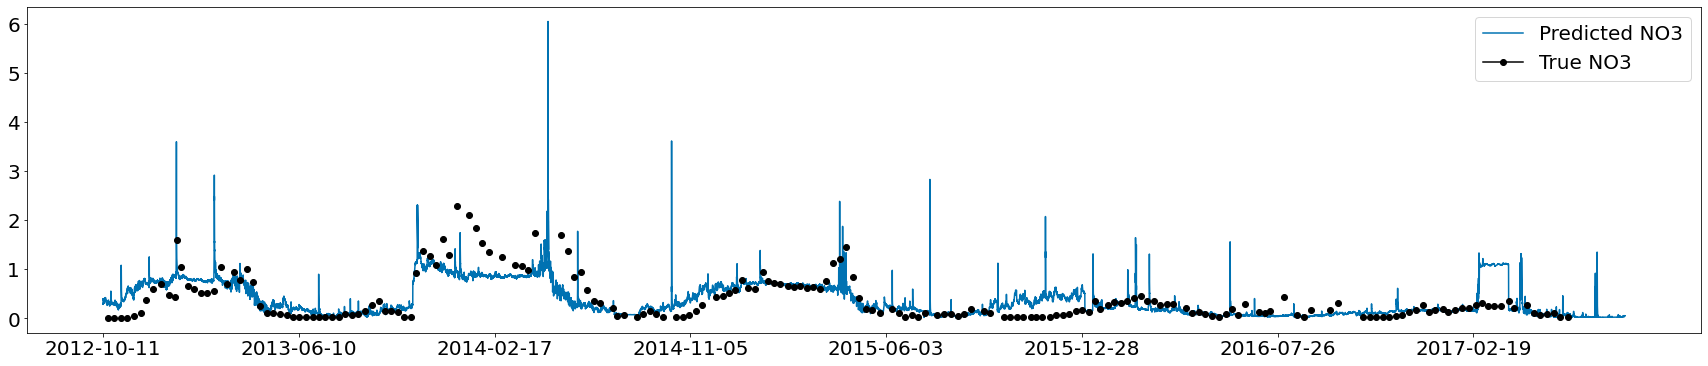

In [92]:
plt.figure(figsize=(30,6))
plt.plot(out[:,-1], color='#0072B2', label='Predicted NO3')
plt.plot(whole["GN_NO3"], color='black', label='True NO3',marker='o')
plt.xticks(range(0,whole.shape[0],20000),whole['date_x'].loc[::20000], fontsize=20)#,rotation=45
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [93]:
plt.figure(figsize=(30,6))
plt.plot(out[:,-1], color='#0072B2', label='Predicted NO3')
plt.plot(whole["IS_NO3"], color='black', label='True NO3',marker='o')
plt.xticks(range(0,whole.shape[0],20000),whole['date_x'].loc[::20000], fontsize=20)#,rotation=45
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()